In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\train - train.csv")

In [3]:
df=data.copy()

In [4]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(6019, 13)

In [6]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('New_Price',axis=1,inplace=True)

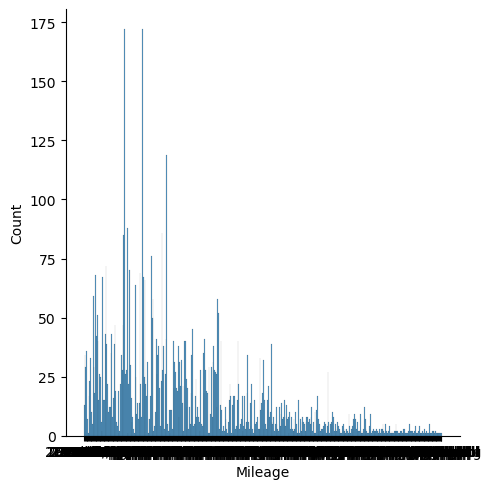

In [9]:
sns.displot(data=df,x='Mileage')
plt.show()

In [10]:
df.Mileage.describe()

count          6017
unique          442
top       18.9 kmpl
freq            172
Name: Mileage, dtype: object

In [11]:
df['Mileage']=df['Mileage'].fillna('unknown')

In [12]:
df['Mileage']=df['Mileage'].apply(lambda x: x.strip().split(' ')[0])

In [13]:
df[df.Mileage.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [14]:
df['Mileage']=pd.to_numeric(df['Mileage'],errors='coerce')

In [15]:
df['Mileage'].isna().sum()

2

In [16]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].median())

In [17]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998 CC,67.1 bhp,5.0,2.65


In [18]:
df['Engine']=df['Engine'].fillna('unknown')
df['Engine']=df['Engine'].apply(lambda x: x.strip().split(' ')[0])
df['Engine']=pd.to_numeric(df['Engine'],errors='coerce')
df['Engine']=df['Engine'].fillna(df['Engine'].median())

In [19]:
df['Power']=df['Power'].fillna('unknown')
df['Power']=df['Power'].apply(lambda x: x.strip().split(' ')[0])
df['Power']=pd.to_numeric(df['Power'],errors='coerce')
df['Power']=df['Power'].fillna(df['Power'].median())

In [20]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [21]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [22]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


In [23]:
df['Brand']=df['Name'].apply(lambda x: x.strip().split(' ')[0].lower())

In [24]:
df


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,maruti


In [25]:
df['Brand'].nunique()

30

In [26]:
df['Brand'].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Brand, dtype: int64

In [27]:
#df.drop(['ambassador','force','smart'],axis=0)  #### 8lat
 

In [28]:
df.drop('Name',axis=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,maruti


In [29]:
df.drop(df.index[df['Brand'].isin(['isuzu,force,smart,ambassador,bentley,lamborghini'])],axis=0,inplace=True)

In [30]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,maruti


In [31]:
df.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [32]:
df.drop(df.index[df['Fuel_Type'].isin(['LPG','CNG','Electric'])])

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,nissan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,maruti


In [33]:
sns.displot(data=df,x='Kilometers_Driven')

In [34]:
!pip install datasist

Defaulting to user installation because normal site-packages is not writeable


In [35]:
from datasist.structdata import detect_outliers

In [36]:
outlier_idx=detect_outliers(df,0,['Kilometers_Driven'])
len(outlier_idx)

202

In [37]:
df[df['Brand']=='bmw']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,18.55,bmw
86,BMW 5 Series 2003-2012 525d,Delhi,2011,75000,Diesel,Automatic,Second,16.73,1995.0,218.0,5.0,13.90,bmw
113,BMW 3 Series 320d Luxury Line,Mumbai,2015,56087,Diesel,Automatic,First,22.69,1995.0,190.0,5.0,20.75,bmw
118,BMW 5 Series 2010-2013 525i,Mumbai,2009,128000,Petrol,Automatic,First,10.80,2497.0,215.0,5.0,7.00,bmw
137,BMW 1 Series 118d Base,Coimbatore,2015,31821,Diesel,Automatic,First,20.58,1995.0,143.0,5.0,17.22,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,BMW 3 Series 320d Prestige,Hyderabad,2015,30000,Diesel,Automatic,First,18.88,1995.0,184.0,5.0,22.00,bmw
5775,BMW 6 Series Gran Coupe,Mumbai,2013,30000,Diesel,Automatic,First,17.54,2993.0,313.0,4.0,45.00,bmw
5845,BMW 5 Series 525d Sedan,Mumbai,2013,35000,Diesel,Automatic,First,16.73,2993.0,218.0,5.0,21.00,bmw
5868,BMW 3 Series 330d Convertible,Kochi,2014,51240,Diesel,Automatic,First,8.20,2993.0,245.0,4.0,29.52,bmw


In [38]:
#df.drop(outlier_idx, inplace=True)

In [39]:
df.Year.value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

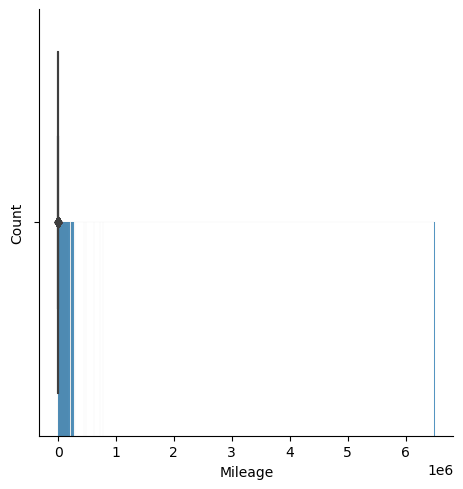

In [40]:
sns.boxplot(data=df,x='Mileage')
plt.show()

In [41]:
df['Mileage'].loc[df['Mileage']<7] = df['Mileage'].median()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30228\4184112150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'].loc[df['Mileage']<7] = df['Mileage'].median()


In [42]:
df.loc[df['Mileage']<7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand


In [43]:
df[df['Brand']=='mercedes-benz']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,mercedes-benz
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,mercedes-benz
62,Mercedes-Benz New C-Class C 200 CGI Avantgarde,Delhi,2015,58000,Petrol,Automatic,First,11.74,1796.0,186.00,5.0,26.70,mercedes-benz
63,Mercedes-Benz New C-Class 200 CDI Classic,Pune,2011,65000,Diesel,Manual,Second,15.80,2148.0,170.00,5.0,10.00,mercedes-benz
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,18.15,1950.0,194.00,5.0,35.67,mercedes-benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963,Mercedes-Benz New C-Class C 200 AVANTGARDE,Mumbai,2013,25000,Petrol,Automatic,First,14.74,1991.0,181.04,5.0,14.85,mercedes-benz
5965,Mercedes-Benz New C-Class C 250 CDI Elegance,Hyderabad,2012,65000,Diesel,Automatic,First,14.94,2143.0,204.00,5.0,16.00,mercedes-benz
5970,Mercedes-Benz GLA Class 200 Sport,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991.0,183.00,5.0,26.76,mercedes-benz
5984,Mercedes-Benz New C-Class C 200 CGI Elegance,Mumbai,2012,63720,Petrol,Automatic,First,11.74,1796.0,186.00,5.0,13.25,mercedes-benz


In [44]:
outlier_idx=detect_outliers(df,0,['Mileage'])
len(outlier_idx)

14

## encoding categorical features 


##binary encoding

In [45]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [46]:
from category_encoders import BinaryEncoder

In [47]:
bin_encoder=BinaryEncoder() #ba5od mno class

In [48]:
binary_encoded_features=bin_encoder.fit_transform(df[['Location','Brand']])
binary_encoded_features.head(3)

,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0
2,0,0,1,1,0,0,0,1,1


In [49]:
bin_encoder.inverse_transform(binary_encoded_features) 

,Location,Brand
0,Mumbai,maruti
1,Pune,hyundai
2,Chennai,honda
3,Chennai,maruti
4,Coimbatore,audi
...,...,...
6014,Delhi,maruti
6015,Jaipur,hyundai
6016,Jaipur,mahindra
6017,Kolkata,maruti


In [50]:
df.drop(['Location','Brand'],axis=1,inplace=True)

In [51]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [52]:
df=pd.concat([df,binary_encoded_features],axis=1)

In [53]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0,0,1,0,0,0,0,1,0
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0,0,1,1,0,0,0,1,1
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0,0,1,1,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,1,0,0,1,0,0,0,0,1
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,0,1,1,0,0,0,0,1,0
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,0,1,1,0,0,1,1,1,0
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,1,0,0,0,0,0,0,0,1


In [54]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [55]:
trans_dict={'Manual':0,'Automatic':1}

In [56]:
df['Transmission']=df['Transmission'].map(trans_dict) #btmshy 3la kol row w tshel el key w thot el value bta3to

In [57]:
df.dtypes

Name                  object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Location_0             int64
Location_1             int64
Location_2             int64
Location_3             int64
Brand_0                int64
Brand_1                int64
Brand_2                int64
Brand_3                int64
Brand_4                int64
dtype: object

In [58]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [59]:
Owner_dict={'First':3,'Second':2,'Third':1}

In [60]:
df['Owner_Type']=df['Owner_Type'].replace(Owner_dict.keys(),Owner_dict.values())

In [61]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,Maruti Wagon R LXI CNG,2010,72000,CNG,0,3,26.60,998.0,58.16,5.0,1.75,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,0,3,19.67,1582.0,126.20,5.0,12.50,0,0,1,0,0,0,0,1,0
2,Honda Jazz V,2011,46000,Petrol,0,3,18.20,1199.0,88.70,5.0,4.50,0,0,1,1,0,0,0,1,1
3,Maruti Ertiga VDI,2012,87000,Diesel,0,3,20.77,1248.0,88.76,7.0,6.00,0,0,1,1,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,1,2,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,0,3,28.40,1248.0,74.00,5.0,4.75,1,0,0,1,0,0,0,0,1
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,0,3,24.40,1120.0,71.00,5.0,4.00,0,1,1,0,0,0,0,1,0
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,0,2,14.00,2498.0,112.00,8.0,2.90,0,1,1,0,0,1,1,1,0
6017,Maruti Wagon R VXI,2013,46000,Petrol,0,3,18.90,998.0,67.10,5.0,2.65,1,0,0,0,0,0,0,0,1


In [62]:
pd.get_dummies(df['Fuel_Type']) #hot encoding 3an tare2 el pandas 

,CNG,Diesel,Electric,LPG,Petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6014,0,1,0,0,0
6015,0,1,0,0,0
6016,0,1,0,0,0
6017,0,0,0,0,1


In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
hot_encoder=OneHotEncoder()

In [65]:
hot_matrix=hot_encoder.fit_transform(df['Fuel_Type'].values.reshape(-1,1)).toarray() #ba3ml .reshape lma bakon sh8al 3la coloumn wahed bs lw atnen aw aktr msh h3ml reshape
hot_names=hot_encoder.get_feature_names_out(['Fuel_Type'])

In [66]:
hot_encoded_features=pd.DataFrame(hot_matrix,columns=hot_names)

In [67]:
df=pd.concat([df,hot_encoded_features],axis=1)

In [68]:
df.drop('Fuel_Type',axis=1,inplace=True)

## split data from feature to label


In [69]:
df['Owner_Type']=pd.to_numeric(df['Owner_Type'], errors='coerce')

In [70]:
df.dropna(inplace=True)

In [71]:
x=df.drop('Price',axis=1)
y=df['Price']

In [72]:
df.drop(['Name'],inplace=True,axis=1)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4178, 23), (1791, 23), (4178,), (1791,))

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler=MinMaxScaler()

In [78]:
scaler.fit(X_train)

ValueError: could not convert string to float: 'Ford Figo Petrol EXI'

In [ ]:
X_train_scaled=scaler.transform(X_train)

In [ ]:
scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

## model creation


In [ ]:
model_LR=LinearRegression()

In [ ]:
model_LR.fit(X_train_scaled,y_train)

In [ ]:
model_LR.score(X_train_scaled,y_train) #kol ma bt2rb lel 1 btb2a ahsan w hia ben el zero w el wahed 

In [ ]:
y_pred=model_LR.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_pred,y_test)

In [ ]:
plt.figure(figsize=(20,9))
sns.displot(y_pred-y_test)
plt.show()